# Spaceship Titanic
Predict which passengers are transported to an alternate dimension

Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold



Loading Data and basic information of dataset

In [2]:
train_data=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\train.csv")
test_data=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\test.csv")

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_data.shape   #to know howmany rows and columns in dataset

(8693, 14)

In [6]:
test_data.shape

(4277, 13)

In [7]:
train_data.info()   #all basic information of database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [8]:
train_data.describe()  # to know the basic characterstics of numerical data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [9]:
train_data.describe(include='object') #for categorical values


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


DATA CLEANING

In [10]:
train_data.isnull()  #Finding null data in dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
train_data.isnull().sum() # finding total null values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
num_data = [column for column in train_data.select_dtypes(["int", "float"])]
cat_data = [column for column in train_data.select_dtypes(exclude = ["int", "float"])]
cat_test_data=[column for column in test_data.select_dtypes(exclude=['int','float'])]
num_test_data=[column for column in test_data.select_dtypes(["int", "float"])]


In [13]:
for i in cat_data:
    train_data[i].fillna(train_data[i].value_counts().mode(),inplace=True)
    
for i in cat_test_data:
    test_data[i].fillna(test_data[i].value_counts().mode(),inplace=True)

for i in num_data:
    train_data[i].fillna(train_data[i].mean(),inplace=True)
for i in num_test_data:
    test_data[i].fillna(test_data[i].mean(),inplace=True)



In [14]:
train_data.isna().any() #confirming for any null values

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age             False
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
Transported     False
dtype: bool

In [15]:
test_data.isna().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age             False
VIP              True
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Name             True
dtype: bool

In [16]:
for col_name in train_data.columns:
    if(train_data[col_name].dtype == 'object'):
        train_data[col_name]= train_data[col_name].astype('category')
        train_data[col_name] = train_data[col_name].cat.codes
        #converting categorical values in numerical value
for col_name in test_data.columns:
    if(test_data[col_name].dtype == 'object'):
        test_data[col_name]= test_data[col_name].astype('category')
        test_data[col_name] = test_data[col_name].cat.codes        

EDA

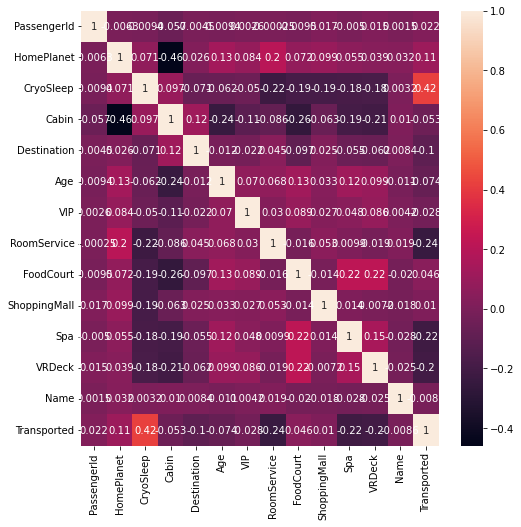

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()                                     #Heatmap

C:\Users\gyanendra singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='HomePlanet'>

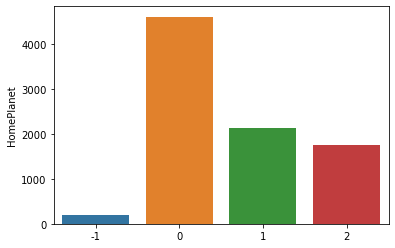

In [18]:

sns.barplot(train_data.HomePlanet.value_counts().index,train_data.HomePlanet.value_counts())

Text(0, 0.5, 'Transported')

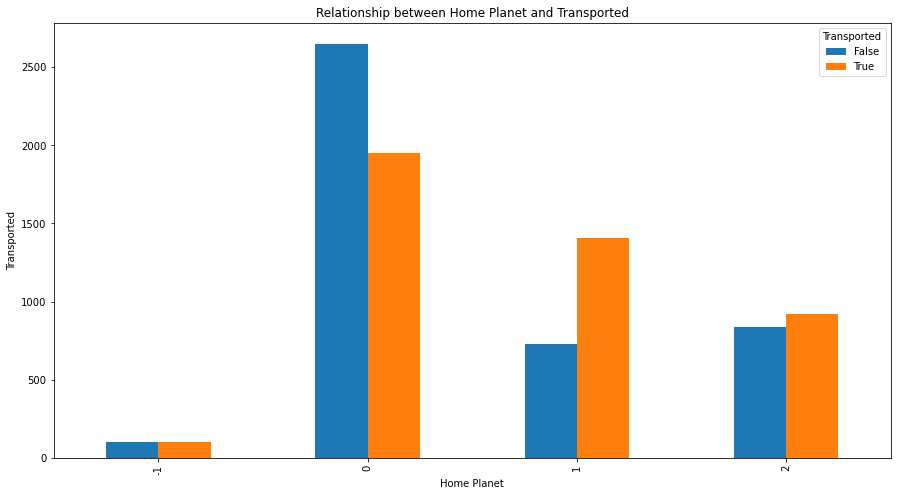

In [19]:
HomePlanet_transported = pd.crosstab(train_data.HomePlanet, train_data.Transported)
HomePlanet_transported.plot(figsize= (15, 8), kind = 'bar')
plt.title('Relationship between Home Planet and Transported')
plt.xlabel('Home Planet')
plt.ylabel('Transported')

Text(0, 0.5, 'Transported')

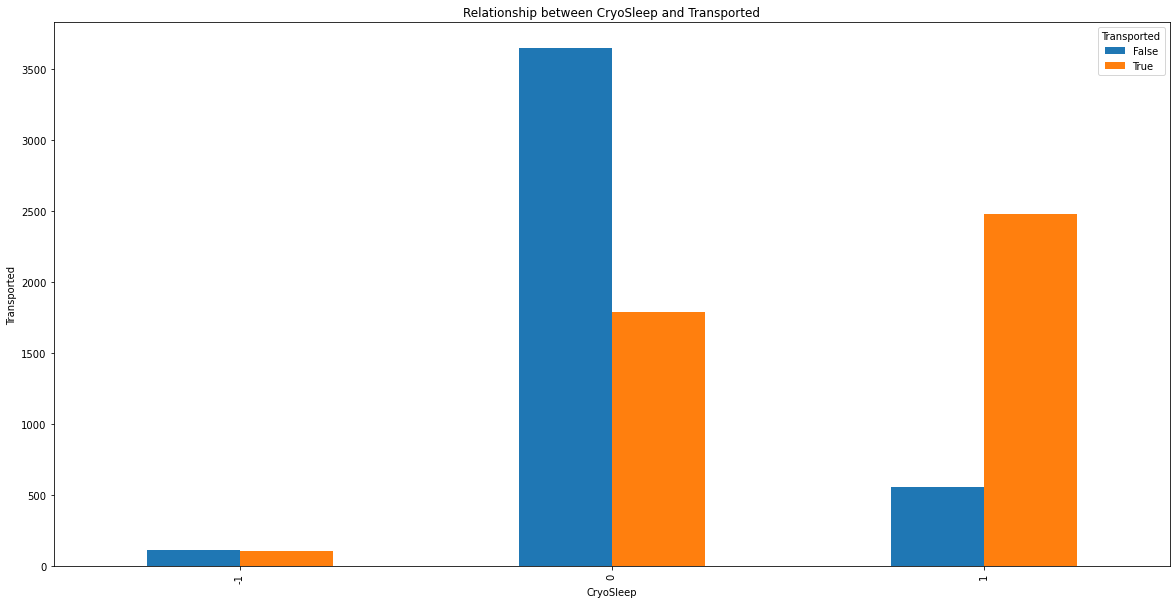

In [20]:
CryoSleep_transported = pd.crosstab(train_data.CryoSleep, train_data.Transported)
CryoSleep_transported.plot(figsize= (20, 10), kind = 'bar')
plt.title('Relationship between CryoSleep and Transported')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')

Text(0, 0.5, 'Transported')

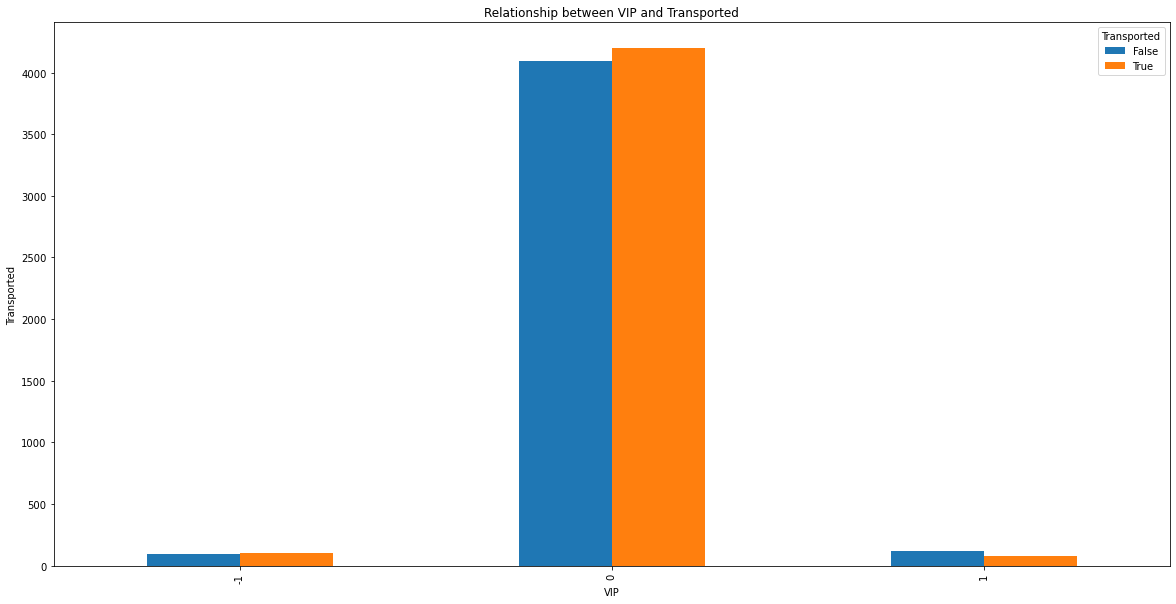

In [21]:
VIP_transported = pd.crosstab(train_data.VIP, train_data.Transported)
VIP_transported.plot(figsize= (20, 10), kind = 'bar')
plt.title('Relationship between VIP and Transported')
plt.xlabel('VIP')
plt.ylabel('Transported')

# Prediction with Logistic Regression

In [23]:
X = train_data.drop(["Transported"], axis=1)
y = train_data.Transported
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train,y_train)

C:\Users\gyanendra singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model.predict(X_test)

array([ True,  True,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False,  True,

In [27]:
model.score(X_test,y_test)

0.7620689655172413

In [28]:
test_pred_LR = model.predict(test_data)
test_pred_LR

array([ True, False,  True, ...,  True,  True,  True])

In [29]:
sample_submission=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\sample_submission.csv")
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [30]:
sample_submission.Transported=test_pred_LR
LR_results=sample_submission
print(LR_results)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [ ]:
LR_results.to_csv('submission.csv',index=False)

# Prediction with KFold

In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [37]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [38]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []

scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test)) 
    


In [39]:
scores_logistic

[0.771264367816092]

In [55]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8080459770114943

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
test_pred_rf = model.predict(test_data)
test_pred_rf

array([ True, False,  True, ...,  True,  True,  True])

In [50]:
sample_submission=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\sample_submission.csv")
sample_submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [51]:
sample_submission.Transported=test_pred_rf
rf_results=sample_submission
print(rf_results)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01         True
4274     9271_01         True
4275     9273_01         True
4276     9277_01         True

[4277 rows x 2 columns]


In [52]:
rf_results.to_csv('submission.csv',index=False)

In [56]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'),X_test,y_test,cv=5)

array([0.81609195, 0.77011494, 0.78735632, 0.72413793, 0.7816092 ])

In [100]:
cross_val_score(RandomForestClassifier(n_estimators=50),X_test,y_test,cv=10)

array([0.77011494, 0.82758621, 0.64367816, 0.7816092 , 0.83908046,
       0.83908046, 0.77011494, 0.7816092 , 0.8045977 , 0.71264368])

In [101]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores1)

0.7862068965517242

In [102]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores2)

0.7873563218390804

In [103]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),X_test,y_test, cv=10)
np.average(scores3)

0.7827586206896552

In [104]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores4)

0.7666666666666667

In [105]:
scores5 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores5)

0.789655172413793

In [106]:
scores6 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores6)

0.771264367816092

In [81]:
scores7 = cross_val_score(RandomForestClassifier(n_estimators=40),X_test,y_test, cv=10)
np.average(scores7)

0.771264367816092

In [108]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(train_data)
X_pca.shape

(8693, 6)

In [109]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6981023576768257